In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LeakyReLU

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("Loading data")
print("x_train.shape: ", x_train.shape)

Loading data
x_train.shape:  (60000, 28, 28)


In [3]:
#CNN requires 3 dimensions
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train.shape: ", x_train.shape)

x_train.shape:  (60000, 28, 28, 1)


In [4]:
# number of classes
K = len(set(y_train))
print("num classes: ", + K)

num classes:  10


In [5]:
%%time
# Input layer
print("Shape: ", x_train[0].shape)
i = Input(shape=x_train[0].shape)

# no. params = kernalSize + bias * numFilters
# conv2d param# 1904 = (5x5 + 1) * 112
x = Conv2D(112, (4, 4), padding='Same', activation=None)(i)
# batch_normalization
x = BatchNormalization()(x)
# activation
x = LeakyReLU(alpha=0.1)(x)

# conv2d_1 param# 64,576 = (3*3*112 + 1) * 64
x = Conv2D(64, (3, 3), padding='Same', activation=None)(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)

# conv2d_2 params# 204,928 = (5*5*64 + 1) * 128
x = Conv2D(128, (5, 5), padding='Same', activation=None)(x)
x = BatchNormalization()(x)
#activation_2 (outputSize: 28,28,128)
x = LeakyReLU(alpha=0.1)(x)

# max_pooling2d (outputSize: 14,14,128)
x = MaxPooling2D((2, 2))(x)

# flatten (outputsize: 14*14*128 = 25,088)
x = Flatten()(x)

# dense (params: (inputSize + bias) * units = (25,088 + 1) * 208 = 5,218,512)
x = Dense(208, activation=None)(x)
x = LeakyReLU(alpha=0.1)(x)
#dropout
x = Dropout(0.2)(x)
#dense_1
x = Dense(160, activation=None)(x)
x = LeakyReLU(alpha=0.1)(x)
#dropout_1
x = Dropout(0.2)(x)
#dense_2
x = Dense(128, activation=None)(x)
x = LeakyReLU(alpha=0.1)(x)
#dropout_2
x = Dropout(0.2)(x)
# dense_3
x = Dense(10, activation='softmax')(x)

model = Model(i, x)
model.summary()

Shape:  (28, 28, 1)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 112)       1904      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 112)      448       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 112)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        64576     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                         

In [6]:
%%time
# compile and fit
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1)

2023-12-04 22:42:13.630726: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 312s 166ms/step - loss: 0.5986 - accuracy: 0.7966 - val_loss: 0.3632 - val_accuracy: 0.8634
CPU times: user 30min 12s, sys: 1min 51s, total: 32min 3s
Wall time: 5min 11s


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


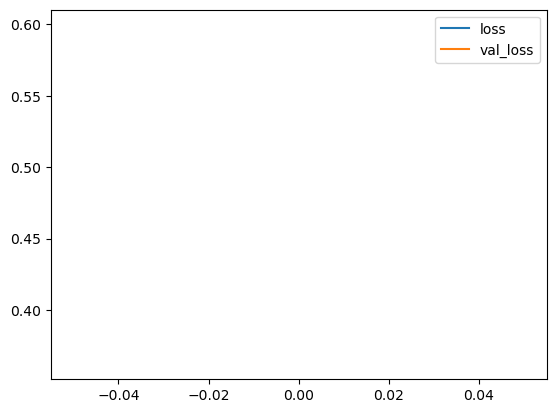

CPU times: user 136 ms, sys: 5.26 ms, total: 141 ms
Wall time: 76 ms


In [7]:
%%time
print(r.history.keys())

# plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 181ms/step


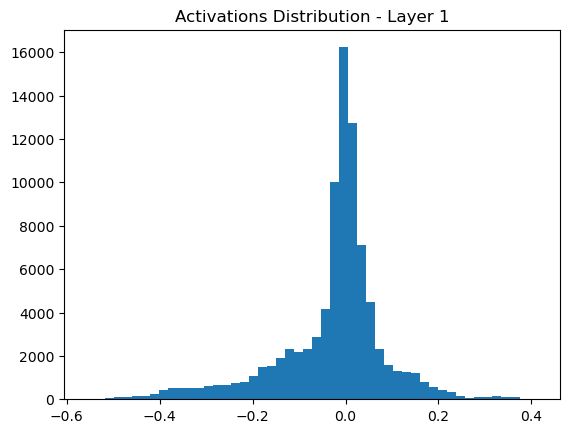

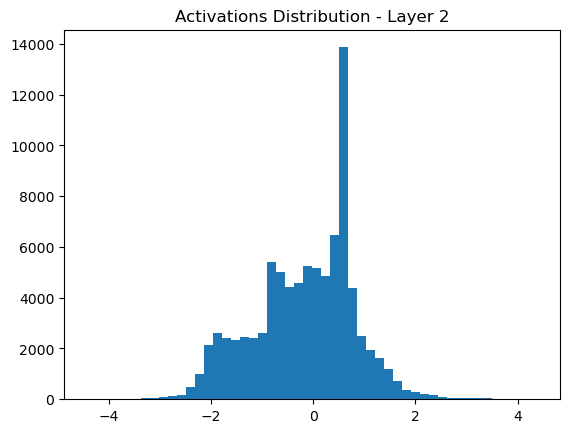

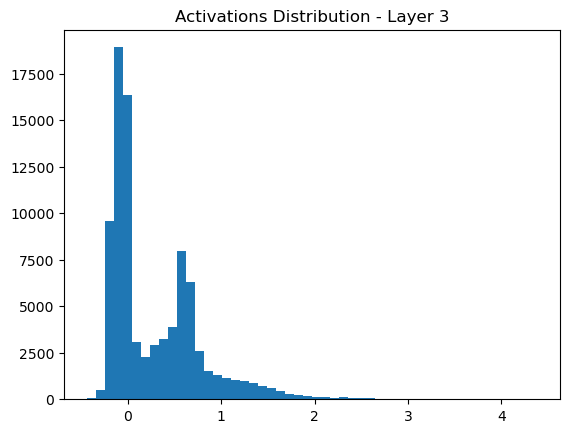

In [8]:
#It is seen that there is a small slope for negatives values being created in the layer#2.
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# Get activations for a specific input (e.g., x_train[0])
activations = activation_model.predict(np.expand_dims(x_train[0], axis=0))

layer_index = 1
plt.hist(activations[layer_index].flatten(), bins=50)
plt.title(f'Activations Distribution - Layer {layer_index}')
plt.show()

plt.hist(activations[2].flatten(), bins=50)
plt.title(f'Activations Distribution - Layer {2}')
plt.show()

plt.hist(activations[3].flatten(), bins=50)
plt.title(f'Activations Distribution - Layer {3}')
plt.show()

In [ ]:
%%time
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# Get activations for a specific input (e.g., x_train[0])
activations = activation_model.predict(np.expand_dims(x_train[0], axis=0))

layer_index = 1
plt.hist(activations[layer_index].flatten(), bins=50)
plt.title(f'Activations Distribution - Layer {layer_index}')
plt.show()

plt.hist(activations[2].flatten(), bins=50)
plt.title(f'Activations Distribution - Layer {2}')
plt.show()

plt.hist(activations[3].flatten(), bins=50)
plt.title(f'Activations Distribution - Layer {3}')
plt.show()